**Food Choices and Preferences of College Students**

Analyzing the Food Choices and Preferences of College Students dataset as one of my first data analyst project. My aim is to demonstrate the following skills: Data cleaning, organising, transformation and analysis.

**About Data**

This dataset includes information on food choices, nutrition, preferences, childhood favourites, and other information from college students. There are 126 responses from students of Mercyhurst University. Data is raw and uncleaned.

**Project Goal**

There are 3 questions we would like to focus on:

- Question 1: Does exercising regularly affect weight of an individual?
- Question 2: Does factors such as: Employment, Income, and Living on or off campus affect the frequency of eating out for college students?
- Question 3: Does students who exercise regularly more likely to make better food choices?

Step 1: Getting to Know the Dataset

In [142]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median
import altair as alt 
import altair_viewer
from scipy.stats import chi2_contingency

In [143]:
# read the data
df = pd.read_csv('C:/Users/raffa/Downloads/food_coded.csv')

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(125, 61)
GPA                  object
Gender                int64
breakfast             int64
calories_chicken      int64
calories_day        float64
                     ...   
type_sports          object
veggies_day           int64
vitamins              int64
waffle_calories       int64
weight               object
Length: 61, dtype: object
['Gender' 'breakfast' 'calories_chicken' 'calories_day' 'calories_scone'
 'coffee' 'comfort_food_reasons_coded' 'cook'
 'comfort_food_reasons_coded.1' 'cuisine' 'diet_current_coded' 'drink'
 'eating_changes_coded' 'eating_changes_coded1' 'eating_out' 'employment'
 'ethnic_food' 'exercise' 'father_education' 'fav_cuisine_coded'
 'fav_food' 'fries' 'fruit_day' 'grade_level' 'greek_food'
 'healthy_feeling' 'ideal_diet_coded' 'income' 'indian_food'
 'italian_food' 'life_rewarding' 'marital_status' 'mother_education'
 'nutritional_check' 'on_off_campus' 'parents_cook' 'pay_meal_out'
 'persian_food' 'self_perception_weight' 'soup' 'sports' 'thai_food'
 '

Step 2 Data Transformation & Cleaning


In order to answer to our questions, we will select only some relevant columns and create 3 specific dataframes.

In [144]:
#select only the coloumns we need:
df = df[['Gender', 'exercise', 'weight', 'eating_out', 'employment', 'income', 'on_off_campus', 'nutritional_check','veggies_day', 'fruit_day']]
df.head()

,Gender,exercise,weight,eating_out,employment,income,on_off_campus,nutritional_check,veggies_day,fruit_day
0,2,1.0,187,3,3.0,5.0,1.0,5,5,5
1,1,1.0,155,2,2.0,4.0,1.0,4,4,4
2,1,2.0,I'm not answering this.,2,3.0,6.0,2.0,4,5,5
3,1,3.0,"Not sure, 240",2,3.0,6.0,1.0,2,3,4
4,1,1.0,190,2,2.0,6.0,1.0,3,4,4


Question 1 - Does exercising regularly affect weight of an individual?

In [145]:
#Question 1
df_q1 = df[['Gender', 'exercise', 'weight']]

<Axes: >

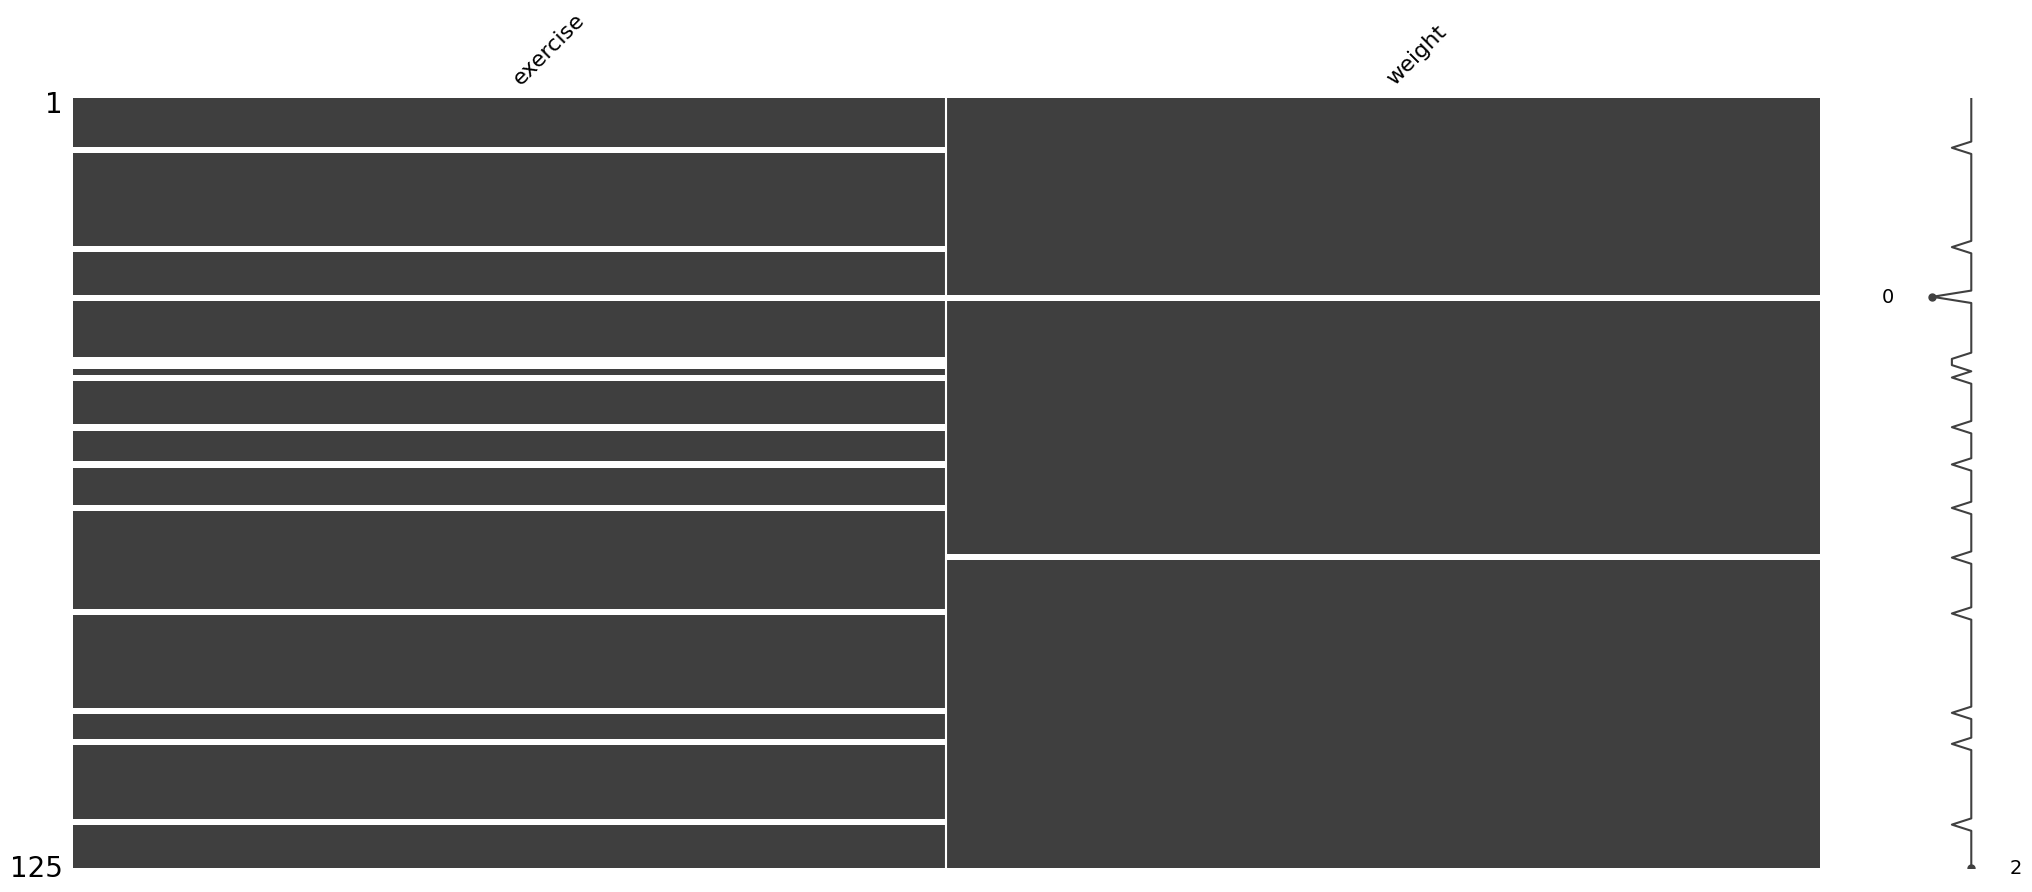

In [146]:
#identify the NaN distribution
msno.matrix(df_q1[df_q1.columns[df_q1.isnull().any()]])

In [147]:
# Filter and print only columns with at least one null value
null_value = df_q1.isnull().sum()
null_value_1 = null_value[null_value > 0]
print(null_value_1)

exercise    13
weight       2
dtype: int64


In [148]:
# drop all the rows that have at least one Nan value
df_q1 = df_q1.copy()
df_q1.dropna(inplace=True)

In [149]:
#Count unique values, dropna=False includes NaN. 
df_q1.exercise.value_counts(dropna=False)

exercise
1.0    57
2.0    43
3.0    11
Name: count, dtype: int64

In [150]:
#Count unique values. 
df_q1.weight.value_counts(dropna=False)

weight
140                         8
170                         7
150                         7
135                         7
185                         6
175                         6
190                         5
180                         5
155                         5
165                         4
145                         4
200                         4
130                         4
125                         4
160                         3
120                         3
129                         2
210                         2
128                         2
167                         2
112                         1
144 lbs                     1
169                         1
260                         1
118                         1
192                         1
184                         1
138                         1
187                         1
168                         1
205                         1
115                         1
195                         1
123

In [151]:
df_q1['weight'] = df_q1['weight'].astype(str)
df_q1.loc[df_q1['weight'] == "144 lbs", 'weight'] = "144"
df_q1.loc[df_q1['weight'] == "Not sure, 240", 'weight'] = "240"
df_q1 = df_q1[df_q1['weight'].str.strip() != "I'm not answering this."]
df_q1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, 0 to 124
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    110 non-null    int64  
 1   exercise  110 non-null    float64
 2   weight    110 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+ KB


We will group the values of the column "weight" in 4 categories:

- 110 - 129 lbs
- 130 - 159 lbs
- 160 - 189 lbs
- more than 190 lbs

We will convert the Integer values in strings:

Exercise:

- 1 - Everyday
- 2 - 2-3 times a week
- 3 - Once a week
- 4 - Sometimes
- 5 - Never


Gender:

- 1 - Female
- 2 - Male

In [152]:
# Convert the "weight" column to numeric values
df_q1['weight'] = pd.to_numeric(df_q1['weight'], errors='coerce')

# Create boolean conditions for each category
cond1 = (110 <= df_q1['weight']) & (df_q1['weight'] <= 129)
cond2 = (130 <= df_q1['weight']) & (df_q1['weight'] <= 159)
cond3 = (160 <= df_q1['weight']) & (df_q1['weight'] <= 189)
cond4 = (df_q1['weight'] >= 190)

# Create a new column 'weight_category' based on conditions
df_q1['weight_category'] = np.select([cond1, cond2, cond3, cond4],
                            ["110 - 129 lbs", "130 - 159 lbs", "160 - 189 lbs", "more than 190 lbs"],
                            default='Unknown')
df_q1.groupby(['weight_category']).size()

weight_category
110 - 129 lbs        17
130 - 159 lbs        39
160 - 189 lbs        37
more than 190 lbs    17
dtype: int64

In [153]:
#Replace values in Gender
df_q1['Gender_name'] = df_q1['Gender'].replace({1: 'Female', 2: 'Male'})
df_q1.groupby(['Gender', 'Gender_name']).size()

Gender  Gender_name
1       Female         64
2       Male           46
dtype: int64

In [154]:
#Create a column called exercise_category. 
df_q1['exercise_category'] = df_q1['exercise'].replace({1: 'Everyday', 2: '2 - 3 times a week', 3: 'Once a week', 4:'Sometimes', 5:'Never'})
df_q1.groupby(['exercise', 'exercise_category']).size()

exercise  exercise_category 
1.0       Everyday              57
2.0       2 - 3 times a week    42
3.0       Once a week           11
dtype: int64

In [155]:
print(df_q1)

     Gender  exercise  weight    weight_category Gender_name  \
0         2       1.0     187      160 - 189 lbs        Male   
1         1       1.0     155      130 - 159 lbs      Female   
3         1       3.0     240  more than 190 lbs      Female   
4         1       1.0     190  more than 190 lbs      Female   
5         1       2.0     190  more than 190 lbs      Female   
..      ...       ...     ...                ...         ...   
120       1       2.0     156      130 - 159 lbs      Female   
121       1       2.0     180      160 - 189 lbs      Female   
122       1       2.0     120      110 - 129 lbs      Female   
123       2       1.0     135      130 - 159 lbs        Male   
124       1       2.0     135      130 - 159 lbs      Female   

      exercise_category  
0              Everyday  
1              Everyday  
3           Once a week  
4              Everyday  
5    2 - 3 times a week  
..                  ...  
120  2 - 3 times a week  
121  2 - 3 times a week

Question 2: Do factors such as Employment, Income, and Living on or off campus affect the frequency of eating out for college students?

In [156]:
#Question 2
df_q2 = df[['eating_out', 'employment', 'income', 'on_off_campus']]

<Axes: >

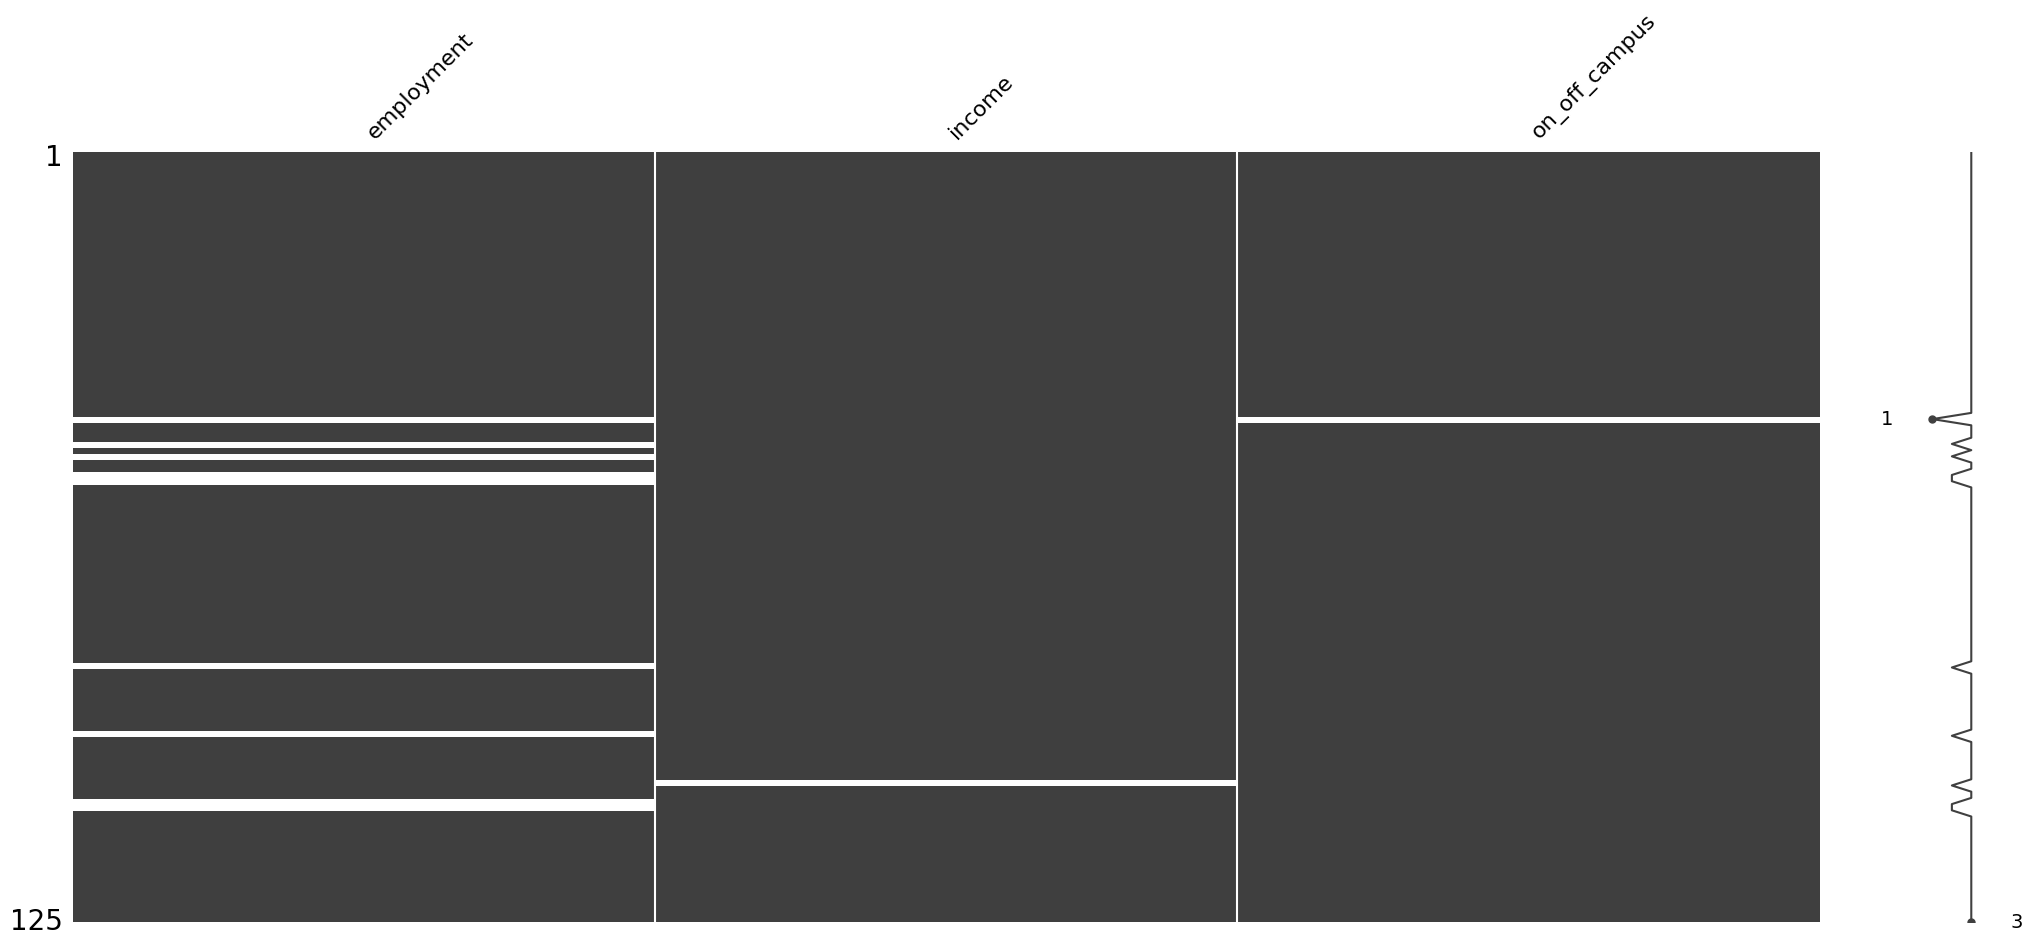

In [157]:
#identify the NaN distribution
msno.matrix(df_q2[df_q2.columns[df_q2.isnull().any()]])

In [158]:
# Filter and print only columns with at least one null value
null_value = df_q2.isnull().sum()
null_value_1 = null_value[null_value > 0]
print(null_value_1)

employment       9
income           1
on_off_campus    1
dtype: int64


In [159]:
# drop all the rows that have at least one Nan value
df_q2 = df_q2.copy()
df_q2.dropna(inplace=True)


In [160]:
print(df_q2)

     eating_out  employment  income  on_off_campus
0             3         3.0     5.0            1.0
1             2         2.0     4.0            1.0
2             2         3.0     6.0            2.0
3             2         3.0     6.0            1.0
4             2         2.0     6.0            1.0
..          ...         ...     ...            ...
120           2         1.0     4.0            3.0
121           4         3.0     2.0            1.0
122           3         3.0     2.0            1.0
123           5         2.0     4.0            1.0
124           1         2.0     5.0            1.0

[115 rows x 4 columns]


We also need to replace all integer responses for eating_out and employment, income, on_off_campus to Stings.

Eating_out:

- 1 - Never
- 2 - 1-2 times
- 3 - 2-3 times
- 4 - 3-4 times
- 5 - Everyday

Employment:

- 1 - Full time
- 2 - Part time
- 3 - Unemployed

Income:

- 1 - less than $15k
- 2 - >$15k - $30k
- 3 - >$30k - $50k
- 4 - >$50k - $70k
- 5 - >$70k - $100k
- 6 - more than $100k

On_off_campus:

- 1 - On campus
- 2 to 4 - Off campus

In [161]:
#check the data types of the coloumns
df_q2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 0 to 124
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   eating_out     115 non-null    int64  
 1   employment     115 non-null    float64
 2   income         115 non-null    float64
 3   on_off_campus  115 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 4.5 KB


In [162]:
df_q2['eating_out'] = df_q2['eating_out'].replace({1: 'Never', 2: '1 -2 times', 3: '2 -3 times', 4:'3 -4 times', 5:'Everyday'})
df_q2.groupby(['eating_out']).size()

eating_out
1 -2 times    56
2 -3 times    21
3 -4 times    13
Everyday      10
Never         15
dtype: int64

In [163]:
df_q2['employment'] = df_q2['employment'].replace({1: 'Full time', 2: 'Part time', 3: 'Umemployed'})
df_q2.groupby(['employment']).size()

employment
Full time      2
Part time     60
Umemployed    53
dtype: int64

In [164]:
print(df_q2['income'].unique())
print(df_q2['income'].dtype)

[5. 4. 6. 1. 3. 2.]
float64


In [165]:
df_q2['income_category'] = df_q2['income'].replace({1: 'less than $15k', 2: '>$15k - $30k', 3: '>$30k - $50k', 4:'>$50k - $70k' , 5:'>$70k - $100k', 6:'more than $100k' })
df_q2.groupby(['income','income_category']).size()

income  income_category
1.0     less than $15k      4
2.0     >$15k - $30k        7
3.0     >$30k - $50k       14
4.0     >$50k - $70k       19
5.0     >$70k - $100k      32
6.0     more than $100k    39
dtype: int64

In [166]:
df_q2['living_on_off_campus'] = df_q2['on_off_campus'].replace({1: 'On campus', 2: 'Off campus', 3: 'Off campus', 4:'Off campus'})
df_q2.groupby(['living_on_off_campus','on_off_campus']).size()

living_on_off_campus  on_off_campus
Off campus            2.0              15
                      3.0               8
                      4.0               2
On campus             1.0              90
dtype: int64

Question 3: Does students who exercise regularly more likely to make better food choices?

In [167]:
#Question 3
df_q3 = df[['exercise', 'nutritional_check', 'veggies_day', 'fruit_day']]

In [168]:
print(df_q3)

     exercise  nutritional_check  veggies_day  fruit_day
0         1.0                  5            5          5
1         1.0                  4            4          4
2         2.0                  4            5          5
3         3.0                  2            3          4
4         1.0                  3            4          4
..        ...                ...          ...        ...
120       2.0                  5            5          5
121       2.0                  3            5          4
122       2.0                  3            4          4
123       1.0                  4            3          5
124       2.0                  5            4          3

[125 rows x 4 columns]


<Axes: >

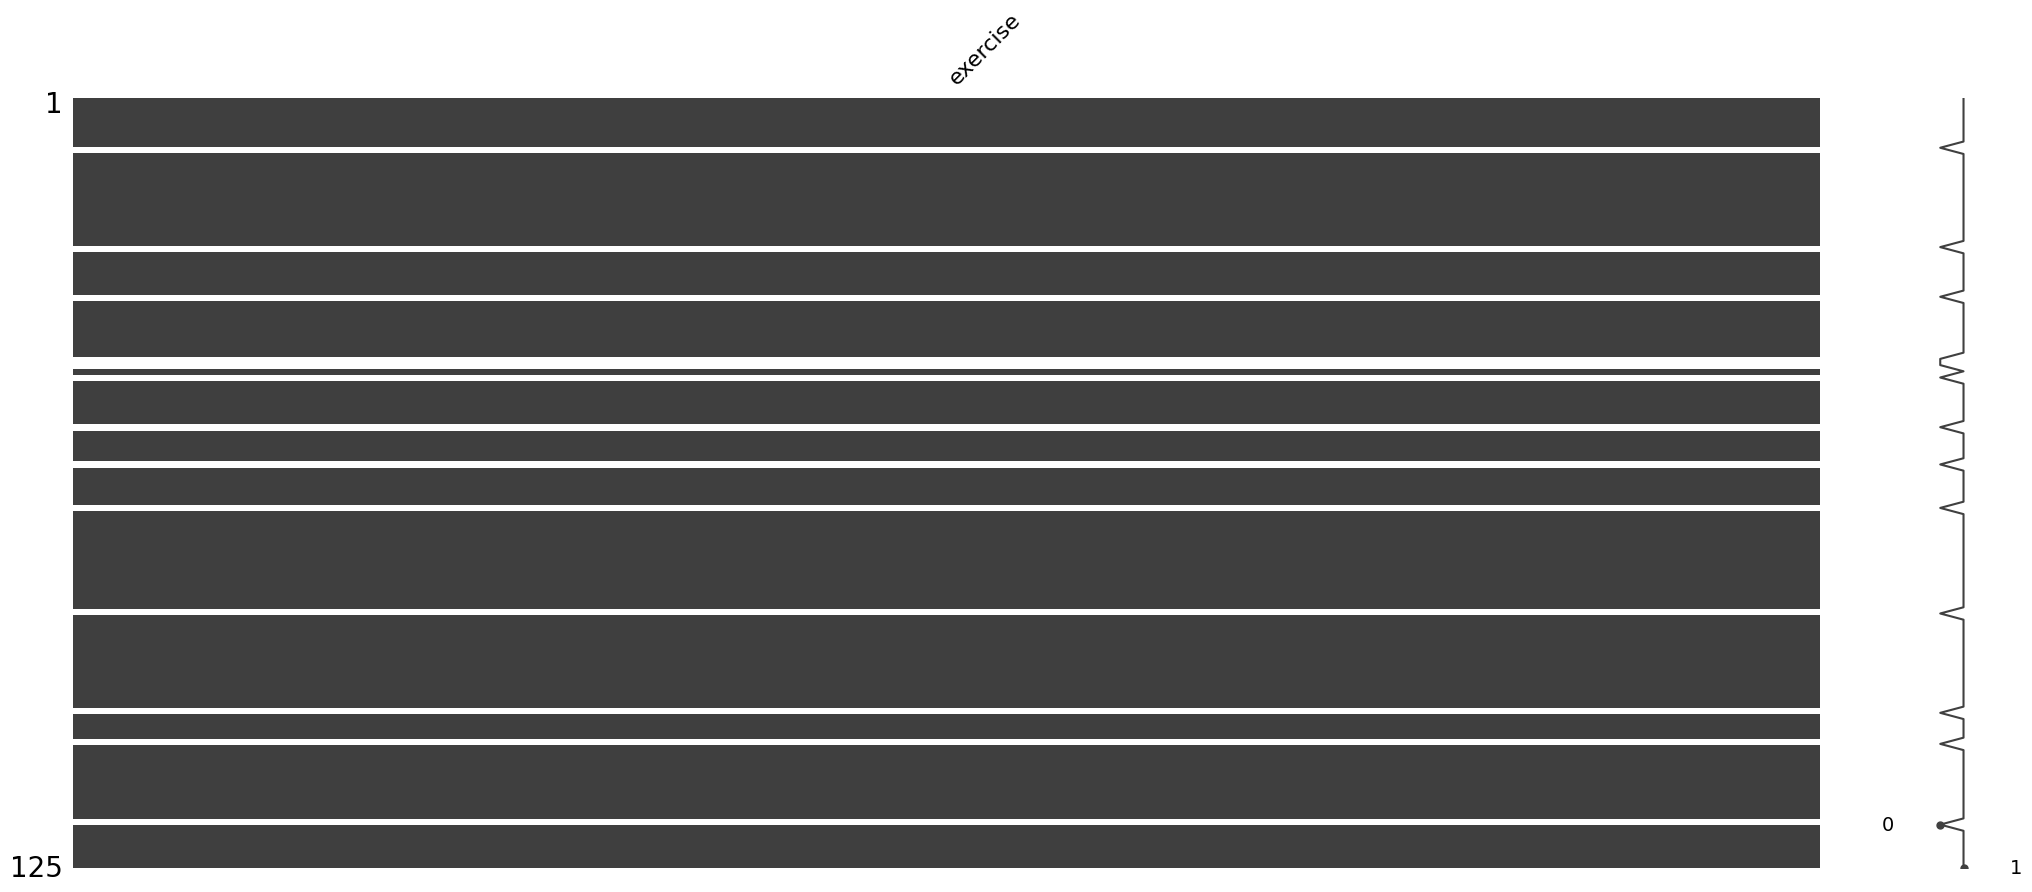

In [169]:
#identify the NaN distribution
msno.matrix(df_q3[df_q3.columns[df_q3.isnull().any()]])

In [170]:
df_q3 = df_q3.copy()
df_q3.dropna(inplace=True)

We also need to replace all integer respond for exercise, nutritional_check, veggie_day, fruit_day to Stings.

Exercise:

- 1 - Everyday
- 2 - 2 -3 times a week
- 3 - Once a week
- 4 - Sometimes
- 5 - Never

Nutritional_check:

- 1 - Never
- 2 - On certain products
- 3 - Very rarely
- 4 - On most products
- 5 - On everything

Veggie_day & fruit_day:

- 1 - Very unlikely
- 2 - Unlikely
- 3 - Neutral
- 4 - Likely
- 5 - Very likely

In [171]:
df_q3['exercise_category'] = df_q3['exercise'].replace({1: 'Everyday', 2: '2 - 3 times a week', 3: 'Once a week', 4:'Sometimes', 5:'Never'})
df_q3.groupby(['exercise', 'exercise_category']).size()

exercise  exercise_category 
1.0       Everyday              57
2.0       2 - 3 times a week    44
3.0       Once a week           11
dtype: int64

In [172]:
df_q3['nutritional_check_category'] = df_q3['nutritional_check'].replace({1: 'Never', 2: 'On certain products', 3: 'Very rarely', 4:'On most products', 5:'On everything'})
df_q3.groupby(['nutritional_check', 'nutritional_check_category']).size()

nutritional_check  nutritional_check_category
1                  Never                          8
2                  On certain products           30
3                  Very rarely                   18
4                  On most products              40
5                  On everything                 16
dtype: int64

In [173]:
df_q3['veggies_day_category'] = df_q3['veggies_day'].replace({1: 'Very unlikely', 2: 'Unlikely', 3: 'Neutral', 4:'Likely', 5:'Very likely'})
df_q3.groupby(['veggies_day', 'veggies_day_category']).size()

veggies_day  veggies_day_category
1            Very unlikely            3
2            Unlikely                11
3            Neutral                 19
4            Likely                  31
5            Very likely             48
dtype: int64

In [174]:
df_q3['fruit_day_category'] = df_q3['fruit_day'].replace({1: 'Very unlikely', 2: 'Unlikely', 3: 'Neutral', 4:'Likely', 5:'Very likely'})
df_q3.groupby(['fruit_day', 'fruit_day_category']).size()

fruit_day  fruit_day_category
1          Very unlikely          1
2          Unlikely               4
3          Neutral               23
4          Likely                26
5          Very likely           58
dtype: int64

Step 3 Analysis

Question 1: Does exercising regularly affect the weight of an individual?

Let's make weight distribution for each gender.

H0: we can conclude that exercise frequency affects the weight of male/female college students in our study.

In [175]:
male_df = df_q1[df_q1['Gender_name'] == 'Male']

# Create a contingency table
contingency_table = pd.crosstab(male_df['exercise_category'], male_df['weight_category'])

# Perform the Chi-Square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

#Set our alpha significant level
alpha = 0.05  

# Check if the p-value is less than alpha to determine the result
if p < alpha:
    print("The p-value is", p,": we REJECT H0: we can conclude that exercise frequency\naffects weight of male college students in our study.")
else:
    print("The p-value is", p, ": we ACCEPT H0: we can conclude that exercise frequency\ndoes not affect weight of male college students in our study.")


The p-value is 0.6084456575538633 :we ACCEPT H0: we can conclude that exercise frequency
does not affect the weight of male college students in our study.


In [176]:
Female_df = df_q1[df_q1['Gender_name'] == 'Female']

# Create a contingency table
contingency_table = pd.crosstab(Female_df['exercise_category'], Female_df['weight_category'])

# Perform the Chi-Square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

#Set our alpha significant level
alpha = 0.05  

# Check if the p-value is less than alpha to determine the result
if p < alpha:
    print("The p-value is", p,":we REJECT H0: we can conclude that exercise frequency\naffects weight of female college students in our study.")
else:
    print("The p-value is", p, ":we ACCEPT H0: we can conclude that exercise frequency\ndoes not affect weight of female college students in our study.")


The p-value is 0.5923567430875245 :we ACCEPT H0: we can conclude that exercise frequency
does not affect weight of female college students in our study.


Question 2: Does factors such as: Employment, Income, and Living on or off campus affect the frequency of eating out for college students?


Test of independence using Chi-Square test. alpha value = 0.05

H0: Factor(employment/income/living on or off campus) has no statistical influence to the frequency of college student eating out.

Employment:

H0: employment status of a college student affects the frequency of eating out.

In [177]:
# Create a contingency table
contingency_table = pd.crosstab(df_q2['employment'], df_q2['eating_out'])

# Perform the Chi-Square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

#Set our alpha significant level
alpha = 0.05  

# Check if the p-value is less than alpha to determine the result
if p < alpha:
    print("The p-value is", p,":we REJECT H0: employment status of a college student\naffects the frequency of eating out.")
else:
    print("The p-value is", p, ":we ACCEPT H0: employment status of a college student\ndoes not affect the frequency of eating out.")


The p-value is 0.6112438708562038 :we ACCEPT H0: employment status of a college student
does not affect the frequency of eating out.


Income:

H0: income of a college student affects the frequency of eating out.

In [178]:
# Create a contingency table
contingency_table = pd.crosstab(df_q2['income_category'], df_q2['eating_out'])

# Perform the Chi-Square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

#Set our alpha significant level
alpha = 0.05  

# Check if the p-value is less than alpha to determine the result
if p < alpha:
    print("The p-value is", p,":we REJECT H0: income of a college student\n affects the frequency of eating out.")
else:
    print("The p-value is", p, ":we ACCEPT H0: income of a college student\n does not affect the frequency of eating out.")


The p-value is 0.6728225879134598 :we ACCEPT H0: income of a college student
 does not affect the frequency of eating out.


Living on and off campus:

H0: living on or off campus affects the frequency of eating out.

In [179]:
# Create a contingency table
contingency_table = pd.crosstab(df_q2['living_on_off_campus'], df_q2['eating_out'])

# Perform the Chi-Square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

#Set our alpha significant level
alpha = 0.05  

# Check if the p-value is less than alpha to determine the result
if p < alpha:
    print("The p-value is", p,":we REJECT H0: living on or off campus affects\nthe frequency of eating out.")
else:
    print("The p-value is", p, ":we ACCEPT H0: living on or off campus does not affect\n the frequency of eating out.")

The p-value is 0.197502080736209 :we ACCEPT H0: living on or off campus does not affect
 the frequency of eating out.


Question 3: Does students who exercise regularly more likely to make better food choices?

H0: Students who exercise regularly are more likely to make better food choices.

Check of nutritional labels exercise regularly:

H0: students who exercise regularly checks nutritional labels of food more regularly.

In [180]:
# Create a contingency table
contingency_table = pd.crosstab(df_q3['nutritional_check_category'], df_q3['exercise_category'])

# Perform the Chi-Square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

#Set our alpha significant level
alpha = 0.05  

# Check if the p-value is less than alpha to determine the result
if p < alpha:
    print("The p-value is", p,":we REJECT H0: students who exercise regularly check nutritional labels of food more regularly.")
else:
    print("The p-value is", p, ":we ACCEPT H0: students who exercise regularly does not check nutritional labels of food more regularly.")

The p-value is 0.13812538434204064 :we ACCEPT H0: students who exercise regularly does not check nutritional labels of food more regularly.


Consume of vegetable vs exercise regularly

H0: students who exercise regularly don't consume more vegetables.

In [181]:
# Create a contingency table
contingency_table = pd.crosstab(df_q3['veggies_day_category'], df_q3['exercise_category'])

# Perform the Chi-Square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

#Set our alpha significant level
alpha = 0.05  

# Check if the p-value is less than alpha to determine the result
if p < alpha:
    print("The p-value is", p,":we REJECT H0: students who exercise regularly don't consume more vegetables.")
else:
    print("The p-value is", p, ":we ACCEPT H0: students who exercise regularly consume more vegetables.")

The p-value is 0.13660826828417633 :we ACCEPT H0: students who exercise regularly consume more vegetables.


Consume of fruits vs exercise regularly

H0: students who exercise regularly do consume more fruits.

In [182]:
# Create a contingency table
contingency_table = pd.crosstab(df_q3['fruit_day_category'], df_q3['exercise_category'])

# Perform the Chi-Square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

#Set our alpha significant level
alpha = 0.05  

# Check if the p-value is less than alpha to determine the result
if p < alpha:
    print("The p-value is", p,":we REJECT H0: students who exercise regularly consume more fruits.")
else:
    print("The p-value is", p, ":we ACCEPT H0: students who exercise regularly don't consume more fruits.")

The p-value is 0.013562799070912852 :we REJECT H0: students who exercise regularly consume more fruits.
